## Instalasi Scikit Fuzzy

In [ ]:
!pip install scikit-fuzzy

## Import Library yang Dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import skfuzzy as fuzz
from skfuzzy import control as ctrl
from sklearn.metrics import confusion_matrix, classification_report

## Import Dataset

In [ ]:
ds = pd.read_csv('plant_health_data.csv')
ds

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


## Pra-Pemrosesan Data

In [ ]:
# Pemilihan Parameter Input dan Output
ds.drop(columns=["Timestamp", "Plant_ID", "Ambient_Temperature", "Soil_Temperature", "Humidity", "Phosphorus_Level", "Potassium_Level", "Electrochemical_Signal", "Nitrogen_Level","Soil_pH"], inplace=True)
ds.columns=["Kelembaban Tanah", "Intensitas Cahaya", "Kandungan Klorofil", "Status Kesehatan"]

# Pengecekan Data yang Kosong dan/atau Duplikat
print(f'\nMissing values: {ds.isna().sum().sum()}')
print(f'Duplicated values: {ds.duplicated().sum()}')

ds


Missing values: 0
Duplicated values: 0


,Kelembaban Tanah,Intensitas Cahaya,Kandungan Klorofil,Status Kesehatan
0,27.521109,556.172805,35.703006,High Stress
1,14.835566,596.136721,27.993296,High Stress
2,17.086362,591.124627,43.646308,High Stress
3,15.336156,241.412476,37.838095,High Stress
4,39.822216,444.493830,48.265812,High Stress
...,...,...,...,...
1195,29.665780,650.536854,24.273224,Moderate Stress
1196,15.490782,768.760787,30.930676,High Stress
1197,23.495723,293.643366,38.324484,Moderate Stress
1198,30.971675,492.952014,46.027529,Healthy


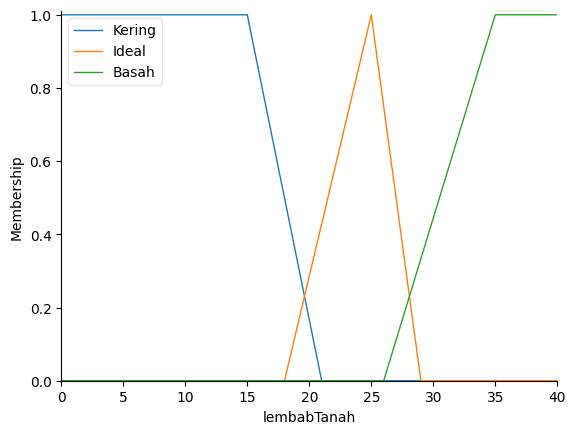

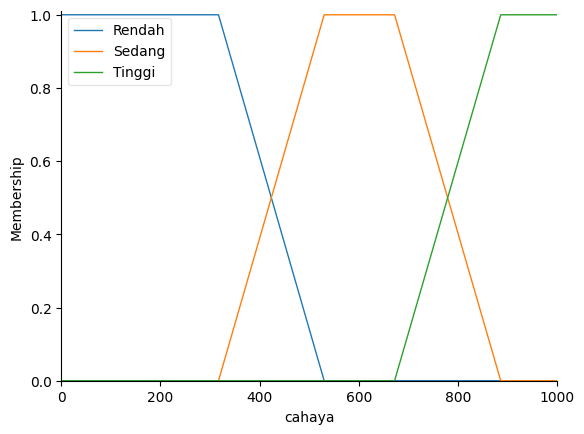

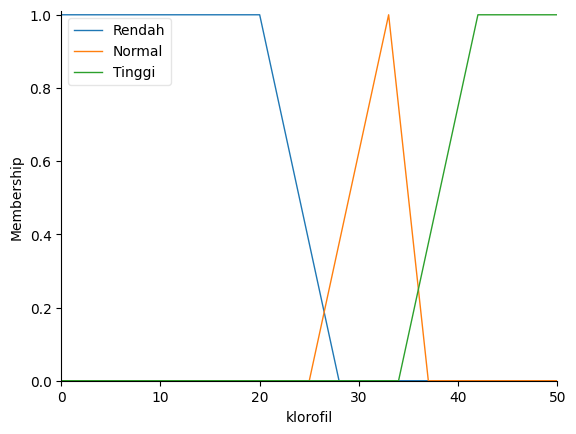

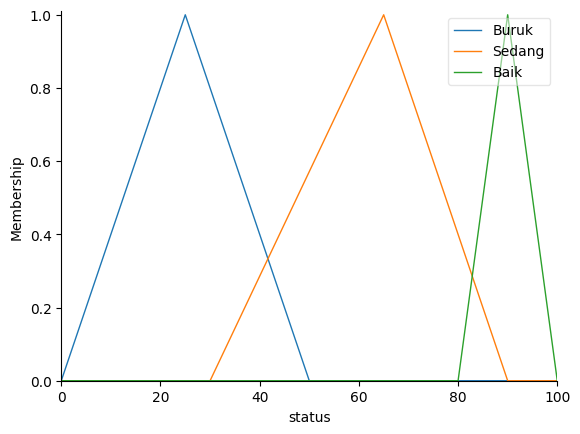

In [ ]:
# Definisi Antecedent (Input) dan Consequent (Output)

max_lembabTanah = math.ceil(ds['Kelembaban Tanah'].max())
max_cahaya = math.ceil(ds['Intensitas Cahaya'].max())
max_klorofil = math.ceil(ds['Kandungan Klorofil'].max())

# Kelembaban Tanah
lembabTanah = ctrl.Antecedent(np.arange(0, max_lembabTanah + 1, 1), 'lembabTanah')
lembabTanah['Kering'] = fuzz.trapmf(lembabTanah.universe, [0, 0, 15, 21])
lembabTanah['Ideal'] = fuzz.trimf(lembabTanah.universe, [19, 25, 29])
lembabTanah['Basah'] = fuzz.trapmf(lembabTanah.universe, [27, 35, 40, 40])
lembabTanah.view()

# Intensitas Cahaya
cahaya = ctrl.Antecedent(np.arange(0, max_cahaya + 1, 1), 'cahaya')
cahaya['Rendah'] = fuzz.trapmf(cahaya.universe, [0, 0, 317, 530])
cahaya['Sedang'] = fuzz.trapmf(cahaya.universe, [317, 530, 672, 886])
cahaya['Tinggi'] = fuzz.trapmf(cahaya.universe, [672, 886, 1000, 1000])
cahaya.view()

# Kandungan Klorofil
klorofil = ctrl.Antecedent(np.arange(0, max_klorofil + 1, 1), 'klorofil')
klorofil['Rendah'] = fuzz.trapmf(klorofil.universe, [0, 0, 20, 28])
klorofil['Normal'] = fuzz.trimf(klorofil.universe, [26, 33, 37])
klorofil['Tinggi'] = fuzz.trapmf(klorofil.universe, [35, 42, 50, 50])
klorofil.view()

# Didefinisikan secara sistematis
status = ctrl.Consequent(np.arange(0, 101, 1), 'status')
status['Buruk'] = fuzz.trimf(status.universe, [0, 25, 50])
status['Sedang'] = fuzz.trimf(status.universe, [30, 65, 90])
status['Baik'] = fuzz.trimf(status.universe, [80, 90, 100])
status.view()

In [ ]:
# Menampilkan Statistik Tanaman Berdasarkan Status Kesehatan
healthy_data = ds[ds['Status Kesehatan'] == 'Healthy']
moderate_data = ds[ds['Status Kesehatan'] == 'Moderate Stress']
high_stress_data = ds[ds['Status Kesehatan'] == 'High Stress']

print("--- Statistik untuk Tanaman 'Healthy' ---")
display(healthy_data[['Kelembaban Tanah', 'Intensitas Cahaya', 'Kandungan Klorofil']].describe())

print("\n--- Statistik untuk Tanaman 'Moderate Stress' ---")
display(moderate_data[['Kelembaban Tanah', 'Intensitas Cahaya', 'Kandungan Klorofil']].describe())

print("\n--- Statistik untuk Tanaman 'High Stress' ---")
display(high_stress_data[['Kelembaban Tanah', 'Intensitas Cahaya', 'Kandungan Klorofil']].describe())

--- Statistik untuk Tanaman 'Healthy' ---


,Kelembaban Tanah,Intensitas Cahaya,Kandungan Klorofil
count,299.000000,299.000000,299.000000
mean,34.905973,603.462775,34.968852
std,3.036787,230.242909,8.769472
min,30.035475,207.812018,20.039569
25%,32.224120,393.552625,27.521972
50%,34.540996,625.147208,34.784378
75%,37.791043,794.646742,42.209659
max,39.947928,996.073556,49.911199



--- Statistik untuk Tanaman 'Moderate Stress' ---


,Kelembaban Tanah,Intensitas Cahaya,Kandungan Klorofil
count,401.000000,401.000000,401.000000
mean,26.556399,611.957444,34.574290
std,4.484009,225.993280,8.825872
min,20.006723,201.736173,20.035069
25%,23.303215,424.438666,27.346407
50%,25.944475,597.432728,34.430251
75%,28.965512,812.523776,42.254818
max,39.974642,999.856262,49.990811



--- Statistik untuk Tanaman 'High Stress' ---


,Kelembaban Tanah,Intensitas Cahaya,Kandungan Klorofil
count,500.000000,500.000000,500.000000
mean,18.084599,618.668827,34.759064
std,7.118813,229.284091,8.732606
min,10.000724,200.615482,20.025511
25%,13.403191,433.161681,27.664011
50%,16.204173,624.065980,34.305013
75%,19.197061,812.308609,42.199375
max,39.993164,999.660376,49.958909


## Metode Mamdani dan Sugeno

In [ ]:
list_aturan_mamdani = [
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Rendah'] & klorofil['Rendah'], status['Buruk']),
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Rendah'] & klorofil['Normal'], status['Buruk']),
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Rendah'] & klorofil['Tinggi'], status['Buruk']),
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Sedang'] & klorofil['Rendah'], status['Buruk']),
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Sedang'] & klorofil['Normal'], status['Buruk']),
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Sedang'] & klorofil['Tinggi'], status['Buruk']),
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Tinggi'] & klorofil['Rendah'], status['Buruk']),
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Tinggi'] & klorofil['Normal'], status['Buruk']),
    ctrl.Rule(lembabTanah['Kering'] & cahaya['Tinggi'] & klorofil['Tinggi'], status['Buruk']),

    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Rendah'] & klorofil['Rendah'], status['Buruk']),
    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Rendah'] & klorofil['Normal'], status['Sedang']),
    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Rendah'] & klorofil['Tinggi'], status['Sedang']),
    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Sedang'] & klorofil['Rendah'], status['Sedang']),
    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Sedang'] & klorofil['Normal'], status['Sedang']),
    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Sedang'] & klorofil['Tinggi'], status['Sedang']),
    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Tinggi'] & klorofil['Rendah'], status['Sedang']),
    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Tinggi'] & klorofil['Normal'], status['Sedang']),
    ctrl.Rule(lembabTanah['Ideal'] & cahaya['Tinggi'] & klorofil['Tinggi'], status['Buruk']),

    ctrl.Rule(lembabTanah['Basah'] & cahaya['Rendah'] & klorofil['Rendah'], status['Buruk']),
    ctrl.Rule(lembabTanah['Basah'] & cahaya['Rendah'] & klorofil['Normal'], status['Baik']),
    ctrl.Rule(lembabTanah['Basah'] & cahaya['Rendah'] & klorofil['Tinggi'], status['Baik']),
    ctrl.Rule(lembabTanah['Basah'] & cahaya['Sedang'] & klorofil['Rendah'], status['Sedang']),
    ctrl.Rule(lembabTanah['Basah'] & cahaya['Sedang'] & klorofil['Normal'], status['Baik']),
    ctrl.Rule(lembabTanah['Basah'] & cahaya['Sedang'] & klorofil['Tinggi'], status['Baik']),
    ctrl.Rule(lembabTanah['Basah'] & cahaya['Tinggi'] & klorofil['Rendah'], status['Sedang']),
    ctrl.Rule(lembabTanah['Basah'] & cahaya['Tinggi'] & klorofil['Normal'], status['Baik']),
    ctrl.Rule(lembabTanah['Basah'] & cahaya['Tinggi'] & klorofil['Tinggi'], status['Baik'])
]
sistem_kontrol_mamdani = ctrl.ControlSystem(list_aturan_mamdani)
sistem_mamdani = ctrl.ControlSystemSimulation(sistem_kontrol_mamdani)

def dapatkan_skor_mamdani(lembab, cahaya, klorofil):
    sistem_mamdani.input['lembabTanah'] = lembab
    sistem_mamdani.input['cahaya'] = cahaya
    sistem_mamdani.input['klorofil'] = klorofil
    sistem_mamdani.compute()
    return sistem_mamdani.output['status']

def kategorikan_mamdani(skor):
    derajat_buruk = fuzz.interp_membership(status.universe, status['Buruk'].mf, skor)
    derajat_sedang = fuzz.interp_membership(status.universe, status['Sedang'].mf, skor)
    derajat_baik = fuzz.interp_membership(status.universe, status['Baik'].mf, skor)

    kategori = {'Buruk': derajat_buruk, 'Sedang': derajat_sedang, 'Baik': derajat_baik}

    return max(kategori, key=kategori.get)

In [ ]:
status_sugeno = {'Buruk': 10, 'Sedang': 50, 'Baik': 90}

aturan_list_sugeno = [
    (('Kering', 'Rendah', 'Rendah'), 'Buruk'),
    (('Kering', 'Rendah', 'Normal'), 'Buruk'),
    (('Kering', 'Rendah', 'Tinggi'), 'Buruk'),
    (('Kering', 'Sedang', 'Rendah'), 'Buruk'),
    (('Kering', 'Sedang', 'Normal'), 'Buruk'),
    (('Kering', 'Sedang', 'Tinggi'), 'Buruk'),
    (('Kering', 'Tinggi', 'Rendah'), 'Buruk'),
    (('Kering', 'Tinggi', 'Normal'), 'Buruk'),
    (('Kering', 'Tinggi', 'Tinggi'), 'Buruk'),
    (('Ideal', 'Rendah', 'Rendah'), 'Buruk'),
    (('Ideal', 'Rendah', 'Normal'), 'Sedang'),
    (('Ideal', 'Rendah', 'Tinggi'), 'Sedang'),
    (('Ideal', 'Sedang', 'Rendah'), 'Sedang'),
    (('Ideal', 'Sedang', 'Normal'), 'Sedang'),
    (('Ideal', 'Sedang', 'Tinggi'), 'Sedang'),
    (('Ideal', 'Tinggi', 'Rendah'), 'Sedang'),
    (('Ideal', 'Tinggi', 'Normal'), 'Sedang'),
    (('Ideal', 'Tinggi', 'Tinggi'), 'Buruk'),
    (('Basah', 'Rendah', 'Rendah'), 'Buruk'),
    (('Basah', 'Rendah', 'Normal'), 'Baik'),
    (('Basah', 'Rendah', 'Tinggi'), 'Baik'),
    (('Basah', 'Sedang', 'Rendah'), 'Sedang'),
    (('Basah', 'Sedang', 'Normal'), 'Baik'),
    (('Basah', 'Sedang', 'Tinggi'), 'Baik'),
    (('Basah', 'Tinggi', 'Rendah'), 'Sedang'),
    (('Basah', 'Tinggi', 'Normal'), 'Baik'),
    (('Basah', 'Tinggi', 'Tinggi'), 'Baik')
]

def dapatkan_skor_sugeno(lembab_val, cahaya_val, klorofil_val):
    # Fuzzifikasi input
    lembab_level_kering = fuzz.interp_membership(lembabTanah.universe, lembabTanah['Kering'].mf, lembab_val)
    lembab_level_ideal = fuzz.interp_membership(lembabTanah.universe, lembabTanah['Ideal'].mf, lembab_val)
    lembab_level_basah = fuzz.interp_membership(lembabTanah.universe, lembabTanah['Basah'].mf, lembab_val)
    val_lembab = {'Kering': lembab_level_kering, 'Ideal': lembab_level_ideal, 'Basah': lembab_level_basah}

    cahaya_level_rendah = fuzz.interp_membership(cahaya.universe, cahaya['Rendah'].mf, cahaya_val)
    cahaya_level_sedang = fuzz.interp_membership(cahaya.universe, cahaya['Sedang'].mf, cahaya_val)
    cahaya_level_tinggi = fuzz.interp_membership(cahaya.universe, cahaya['Tinggi'].mf, cahaya_val)
    val_cahaya = {'Rendah': cahaya_level_rendah, 'Sedang': cahaya_level_sedang, 'Tinggi': cahaya_level_tinggi}

    klorofil_level_rendah = fuzz.interp_membership(klorofil.universe, klorofil['Rendah'].mf, klorofil_val)
    klorofil_level_normal = fuzz.interp_membership(klorofil.universe, klorofil['Normal'].mf, klorofil_val)
    klorofil_level_tinggi = fuzz.interp_membership(klorofil.universe, klorofil['Tinggi'].mf, klorofil_val)
    val_klorofil = {'Rendah': klorofil_level_rendah, 'Normal': klorofil_level_normal, 'Tinggi': klorofil_level_tinggi}

    # Kalkulasi weighted average
    total_alpha_kali_z = 0
    total_alpha = 0
    for (kondisi, konsekuen) in aturan_list_sugeno:
        alpha = min(val_lembab[kondisi[0]], val_cahaya[kondisi[1]], val_klorofil[kondisi[2]])
        z = status_sugeno[konsekuen]
        total_alpha_kali_z += alpha * z
        total_alpha += alpha

    return total_alpha_kali_z / total_alpha if total_alpha != 0 else 0

def kategorikan_sugeno(skor):
    jarak = {label: abs(skor - value) for label, value in status_sugeno.items()}
    return min(jarak, key=jarak.get)

## Evaluasi Kinerja Fuzzy Sistem

In [ ]:
# Siapkan y_true (label yang sebenarnya)
label_mapping = {'High Stress': 'Buruk', 'Moderate Stress': 'Sedang', 'Healthy': 'Baik'}
y_true = ds['Status Kesehatan'].map(label_mapping)

# List untuk menampung hasil prediksi
y_pred_mamdani = []
y_pred_sugeno = []

print("Memulai proses prediksi untuk seluruh dataset...")
# Melakukan iterasi pada setiap baris dataset
for index, row in ds.iterrows():
    # Mengambil nilai input dari setiap baris
    nilai_lembab = row['Kelembaban Tanah']
    nilai_cahaya = row['Intensitas Cahaya']
    nilai_klorofil = row['Kandungan Klorofil']

    # Prediksi Mamdani
    skor_m = dapatkan_skor_mamdani(nilai_lembab, nilai_cahaya, nilai_klorofil)
    prediksi_m = kategorikan_mamdani(skor_m)
    y_pred_mamdani.append(prediksi_m)

    # Prediksi Sugeno
    skor_s = dapatkan_skor_sugeno(nilai_lembab, nilai_cahaya, nilai_klorofil)
    prediksi_s = kategorikan_sugeno(skor_s)
    y_pred_sugeno.append(prediksi_s)

print("Proses prediksi selesai.")

# Definisikan urutan label
labels = ['Buruk', 'Sedang', 'Baik']

# Menampilkan Laporan Evaluasi
print("\n\n--- HASIL EVALUASI MODEL FUZZY MAMDANI ---")
print(classification_report(y_true, y_pred_mamdani, labels=labels, zero_division=0))
print("Confusion Matrix Mamdani:")
print(pd.DataFrame(confusion_matrix(y_true, y_pred_mamdani, labels=labels), index=labels, columns=labels))

print("\n\n--- HASIL EVALUASI MODEL FUZZY SUGENO ---")
print(classification_report(y_true, y_pred_sugeno, labels=labels, zero_division=0))
print("Confusion Matrix Sugeno:")
print(pd.DataFrame(confusion_matrix(y_true, y_pred_sugeno, labels=labels), index=labels, columns=labels))

Memulai proses prediksi untuk seluruh dataset...
Proses prediksi selesai.


--- HASIL EVALUASI MODEL FUZZY MAMDANI ---
              precision    recall  f1-score   support

       Buruk       0.87      0.81      0.84       500
      Sedang       0.71      0.71      0.71       401
        Baik       0.65      0.73      0.69       299

    accuracy                           0.75      1200
   macro avg       0.74      0.75      0.74      1200
weighted avg       0.76      0.75      0.76      1200

Confusion Matrix Mamdani:
        Buruk  Sedang  Baik
Buruk     403      50    47
Sedang     49     283    69
Baik       13      67   219


--- HASIL EVALUASI MODEL FUZZY SUGENO ---
              precision    recall  f1-score   support

       Buruk       0.84      0.82      0.83       500
      Sedang       0.73      0.65      0.69       401
        Baik       0.64      0.76      0.70       299

    accuracy                           0.75      1200
   macro avg       0.74      0.75      0.74   

## Pengujian Fuzzy Sistem Menggunakan Input Data Manual

In [ ]:
# Meminta inputan pengguna
input_lembab_str = input("Masukkan tingkat kelembaban tanaman: ")
input_cahaya_str = input("Masukkan tingkat intensitas cahaya tanaman: ")
input_klorofil_str = input("Masukkan tingkat kandungan klorofil tanaman: ")

# Konversi input string ke float
try:
    input_lembab = float(input_lembab_str)
    input_cahaya = float(input_cahaya_str)
    input_klorofil = float(input_klorofil_str)
except ValueError:
    print("Input tidak valid. Harap masukkan nilai numerik.")
    exit()

# Prediksi Mamdani
skor_m = dapatkan_skor_mamdani(input_lembab, input_cahaya, input_klorofil)
prediksi_m = kategorikan_mamdani(skor_m)

# Prediksi Sugeno
skor_s = dapatkan_skor_sugeno(input_lembab, input_cahaya, input_klorofil)
prediksi_s = kategorikan_sugeno(skor_s)


print(f"\nHasil Prediksi Mamdani: {prediksi_m} (Skor: {skor_m:.2f})")
print(f"Hasil Prediksi Sugeno: {prediksi_s} (Skor: {skor_s:.2f})")

Masukkan tingkat kelembaban tanaman: 27
Masukkan tingkat intensitas cahaya tanaman: 666
Masukkan tingkat kandungan klorofil tanaman: 23

Hasil Prediksi Mamdani: Sedang (Skor: 61.11)
Hasil Prediksi Sugeno: Sedang (Skor: 50.00)
